# PSM on K72 Hepatic Failure Cohort

## Imports

In [40]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Data Prep

In [41]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_for_PSM_1.csv')

In [42]:
df.shape

(27039, 22)

In [43]:
df.albumin.value_counts()

0    19109
1     7930
Name: albumin, dtype: int64

In [44]:
df.albumin_timing.value_counts()

0.0    23634
1.0     2121
2.0     1284
Name: albumin_timing, dtype: int64

In [45]:
df[df['albumin'] == 1].albumin_timing.value_counts()

0.0    4525
1.0    2121
2.0    1284
Name: albumin_timing, dtype: int64

In [46]:
df[df['albumin'] == 1].albumin_lab_baseline_severity.value_counts()

1    7930
Name: albumin_lab_baseline_severity, dtype: int64

In [47]:
df[df['albumin'] == 0].albumin_lab_baseline_severity.value_counts()

0    11367
1     7742
Name: albumin_lab_baseline_severity, dtype: int64

## Create New 24h Variable

In [48]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [49]:
df.albumin_24hrs.value_counts()

0    23634
1     3405
Name: albumin_24hrs, dtype: int64

In [50]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [51]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  albumin_lab_baseline_severity  hgb_bl  90_day_mortality  \
0               2.8                              1    11.5                 1   
1               2.6                              1    11.6                 1   
2               1.3                              1     3.8                 0   
3               1.7                              1    11.6                 1   
4               2.7                              1    15.5                 1   

   90_day_readmission  hospital_free_days  beta_blocker  Cirrhosis  CCI  \
0                 0.0                   0             0          1    3   
1                 0.0                   0             0          1    7   
2                 1.0                  12             1          1    3   
3                 0.0                   0             0          0    4   
4                 0.0                   0             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  albumin_24hrs  
0      0  23.508     0     0        1              1  
1      1  31.904     1     3        1              0  
2      0  28.610     0     0        1              0  
3      2  21.000     2     3        1              0  
4      2  22.640     3     1        1              1

## Save df with pid, eid, outcomes, any other

In [52]:
df_o = df[['personid', 'encounterid', 'albumin', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [53]:
df_o.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

   albumin  LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  
0        1  3.039583                 1                 0.0                   0  
1        1  5.045833                 1                 0.0                   0  
2        1  6.143056                 0                 1.0                  12  
3        1  4.893056                 1                 0.0                   0  
4        1  3.818056                 1                 0.0                   0

In [54]:
# df.drop(columns=['personid', 'encounterid'], inplace=True)

In [55]:
df.shape

(27039, 23)

In [56]:
df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  016db409-ef15-4326-a6e6-9661b6992976  039ff346-b163-4f39-8e64-dca1f76f794e   
2  09264b14-79e8-47d4-85ea-9e46696f953f  1370bec9-c0c6-47fd-8481-a04ad194ba53   
3  0e20e86a-72b3-4c51-97b8-4a5b51afa12d  4d71b500-d898-4675-a9f0-218fe5dee40f   
4  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   

    age  sex  ICU  LOS_days  time_to_albumin  albumin_timing  \
0  68.0    1    0  3.039583        17.950000             2.0   
1  58.0    1    0  5.045833        74.216667             0.0   
2  44.0    1    0  6.143056        53.616667             0.0   
3  83.0    0    1  4.893056        28.888056             0.0   
4  37.0    0    1  3.818056         6.583333             1.0   

   bl_albumin_value  albumin_lab_baseline_severity  hgb_bl  90_day_mortality  \
0               2.8                              1    11.5                 1   
1               2.6                              1    11.6                 1   
2               1.3                              1     3.8                 0   
3               1.7                              1    11.6                 1   
4               2.7                              1    15.5                 1   

   90_day_readmission  hospital_free_days  beta_blocker  Cirrhosis  CCI  \
0                 0.0                   0             0          1    3   
1                 0.0                   0             0          1    7   
2                 1.0                  12             1          1    3   
3                 0.0                   0             0          0    4   
4                 0.0                   0             0          0    2   

   qSOFA    MELD  SEWS  ACLF  albumin  albumin_24hrs  
0      0  23.508     0     0        1              1  
1      1  31.904     1     3        1              0  
2      0  28.610     0     0        1              0  
3      2  21.000     2     3        1              0  
4      2  22.640     3     1        1              1

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27039 entries, 0 to 27038
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       27039 non-null  object 
 1   encounterid                    27039 non-null  object 
 2   age                            27039 non-null  float64
 3   sex                            27039 non-null  int64  
 4   ICU                            27039 non-null  int64  
 5   LOS_days                       27039 non-null  float64
 6   time_to_albumin                27039 non-null  float64
 7   albumin_timing                 27039 non-null  float64
 8   bl_albumin_value               27039 non-null  float64
 9   albumin_lab_baseline_severity  27039 non-null  int64  
 10  hgb_bl                         27039 non-null  float64
 11  90_day_mortality               27039 non-null  int64  
 12  90_day_readmission             27039 non-null 

In [58]:
dict_columns_type = {'sex': float,
                     'ICU': float,
                     'albumin_lab_baseline_severity': float,
                     '90_day_mortality': float,
                     'hospital_free_days': float,
                     'beta_blocker': float,
                     'Cirrhosis': float,
                     'CCI': float,
                     'qSOFA': float,
                     'SEWS': float,
                     'ACLF': float,
                     'albumin': float,
                     }

# df = df.astype(dict_columns_type)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27039 entries, 0 to 27038
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   personid                       27039 non-null  object 
 1   encounterid                    27039 non-null  object 
 2   age                            27039 non-null  float64
 3   sex                            27039 non-null  int64  
 4   ICU                            27039 non-null  int64  
 5   LOS_days                       27039 non-null  float64
 6   time_to_albumin                27039 non-null  float64
 7   albumin_timing                 27039 non-null  float64
 8   bl_albumin_value               27039 non-null  float64
 9   albumin_lab_baseline_severity  27039 non-null  int64  
 10  hgb_bl                         27039 non-null  float64
 11  90_day_mortality               27039 non-null  int64  
 12  90_day_readmission             27039 non-null 

## Initialize PsmPy Class

In [62]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['albumin_timing', 'time_to_albumin', 'albumin_lab_baseline_severity', 'personid', 'albumin', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days'])

In [63]:
%%time
psm.logistic_ps(balance = True)

Wall time: 19.4 s


In [64]:
df_psm = psm.predicted_data

In [65]:
df_psm.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   
2  9fd9125a-e53c-47ef-ad19-8a72d171897f  76.0    0    1               1.8   
3  7e925b39-2be4-4bf1-91d2-1dc475764426  30.0    1    1               1.8   
4  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7  44.0    1    0               1.9   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    15.5             0          0    2      2  22.640     3     1   
2    10.0             0          0    5      1  16.000     2     1   
3    14.4             0          1    3      0  33.848     2     2   
4     8.1             0          1    7      2  37.990     1     1   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.399772         -0.406414              1  
1          0.537462          0.150130              1  
2          0.683792          0.771253              1  
3          0.875114          1.946957              1  
4          0.895469          2.147864              1

In [66]:
df_psm.bl_albumin_value.describe()

count    27039.000000
mean         2.849946
std          0.789459
min          0.600000
25%          2.300000
50%          2.800000
75%          3.400000
max          5.200000
Name: bl_albumin_value, dtype: float64

In [67]:
df_psm.propensity_logit.describe()

count    27039.000000
mean        -0.881748
std          1.796444
min         -7.361974
25%         -2.085252
50%         -0.714800
75%          0.369778
max          5.594913
Name: propensity_logit, dtype: float64

In [68]:
df_psm[df_psm['bl_albumin_value'] > 3.4].propensity_logit.describe()

count    6511.000000
mean       -3.185463
std         1.120731
min        -7.361974
25%        -3.884435
50%        -3.086908
75%        -2.410406
max         0.375527
Name: propensity_logit, dtype: float64

## Plot the propensity score / propensity logits

In [69]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 25min 31s


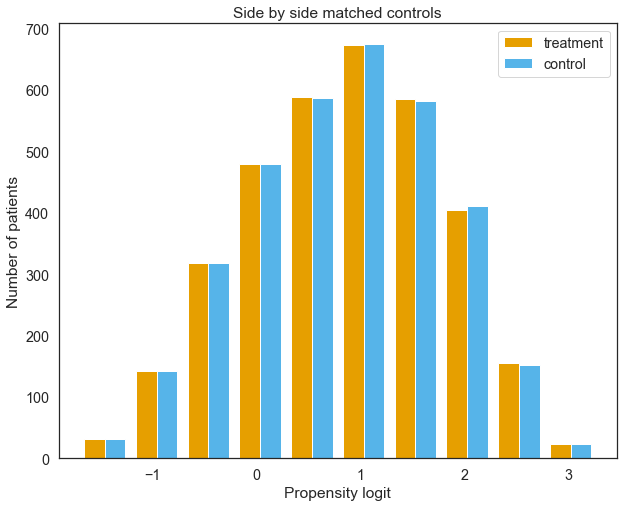

In [70]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

In [71]:
df_psm.propensity_logit.describe()

count    27039.000000
mean        -0.881748
std          1.796444
min         -7.361974
25%         -2.085252
50%         -0.714800
75%          0.369778
max          5.594913
Name: propensity_logit, dtype: float64

## Plot the effect sizes

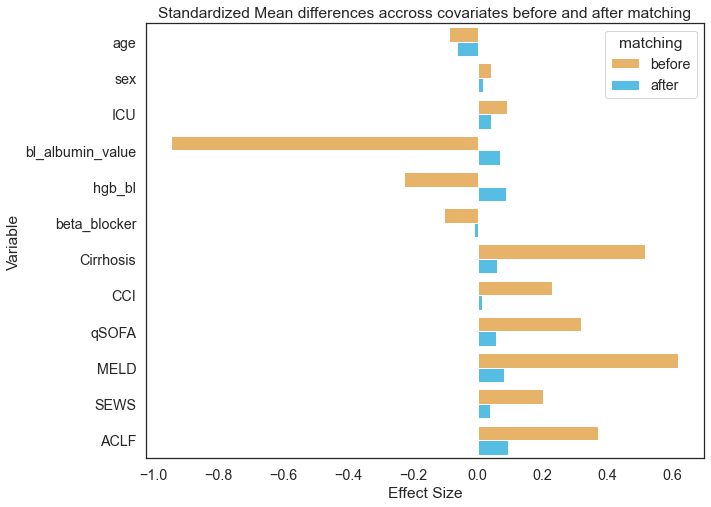

In [72]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [73]:
matched_df = psm.df_matched

In [74]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   
2  9fd9125a-e53c-47ef-ad19-8a72d171897f  76.0    0    1               1.8   
3  7e925b39-2be4-4bf1-91d2-1dc475764426  30.0    1    1               1.8   
4  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7  44.0    1    0               1.9   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    15.5             0          0    2      2  22.640     3     1   
2    10.0             0          0    5      1  16.000     2     1   
3    14.4             0          1    3      0  33.848     2     2   
4     8.1             0          1    7      2  37.990     1     1   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.399772         -0.406414              1  
1          0.537462          0.150130              1  
2          0.683792          0.771253              1  
3          0.875114          1.946957              1  
4          0.895469          2.147864              1

In [75]:
matched_df.shape

(6810, 16)

## Matched Ids

In [76]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  b60e127e-ab2c-433f-9956-766a25c21634
1  af7e9a58-0837-49e0-86b2-e6781ea942f4  ea40089b-c389-4514-a154-072bd5d870d0
2  9fd9125a-e53c-47ef-ad19-8a72d171897f  644bec3a-a12a-4734-8fa9-7fc45fe522c7
3  7e925b39-2be4-4bf1-91d2-1dc475764426  832ebca5-dfe5-488e-a737-76482fef1b4a
4  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7  d68a9cf4-709f-4a1b-be75-62948d1958f2

## Effect sizes per variables

In [77]:
psm.effect_size

Variable matching  Effect Size
0                age   before    -0.089182
1                age    after    -0.064879
2                sex   before     0.041278
3                sex    after     0.014887
4                ICU   before     0.090618
5                ICU    after     0.040344
6   bl_albumin_value   before    -0.944726
7   bl_albumin_value    after     0.067686
8             hgb_bl   before    -0.226035
9             hgb_bl    after     0.086794
10      beta_blocker   before    -0.103135
11      beta_blocker    after    -0.011011
12         Cirrhosis   before     0.516178
13         Cirrhosis    after     0.059079
14               CCI   before     0.228234
15               CCI    after     0.013711
16             qSOFA   before     0.319504
17             qSOFA    after     0.054629
18              MELD   before     0.618276
19              MELD    after     0.082106
20              SEWS   before     0.199537
21              SEWS    after     0.037548
22              ACLF   before     0.370372
23              ACLF    after     0.094531

## Explore Matched df

In [78]:
matched_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   
2  9fd9125a-e53c-47ef-ad19-8a72d171897f  76.0    0    1               1.8   
3  7e925b39-2be4-4bf1-91d2-1dc475764426  30.0    1    1               1.8   
4  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7  44.0    1    0               1.9   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    15.5             0          0    2      2  22.640     3     1   
2    10.0             0          0    5      1  16.000     2     1   
3    14.4             0          1    3      0  33.848     2     2   
4     8.1             0          1    7      2  37.990     1     1   

   propensity_score  propensity_logit  albumin_24hrs  
0          0.399772         -0.406414              1  
1          0.537462          0.150130              1  
2          0.683792          0.771253              1  
3          0.875114          1.946957              1  
4          0.895469          2.147864              1

In [80]:
matched_df.albumin_24hrs.value_counts()

1    3405
0    3405
Name: albumin_24hrs, dtype: int64

In [81]:
matched_df.shape

(6810, 16)

## Join Matched df with earlier df on encounterid to add outcome variables

In [82]:
f_df = matched_df.merge(df_o, on='encounterid', how='left')

In [83]:
f_df.shape

(6810, 22)

In [84]:
f_df.head()

encounterid   age  sex  ICU  bl_albumin_value  \
0  7859a028-911e-452c-ad3f-c04f85f4a9c7  68.0    1    0               2.8   
1  af7e9a58-0837-49e0-86b2-e6781ea942f4  37.0    0    1               2.7   
2  9fd9125a-e53c-47ef-ad19-8a72d171897f  76.0    0    1               1.8   
3  7e925b39-2be4-4bf1-91d2-1dc475764426  30.0    1    1               1.8   
4  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7  44.0    1    0               1.9   

   hgb_bl  beta_blocker  Cirrhosis  CCI  qSOFA    MELD  SEWS  ACLF  \
0    11.5             0          1    3      0  23.508     0     0   
1    15.5             0          0    2      2  22.640     3     1   
2    10.0             0          0    5      1  16.000     2     1   
3    14.4             0          1    3      0  33.848     2     2   
4     8.1             0          1    7      2  37.990     1     1   

   propensity_score  propensity_logit  albumin_24hrs  \
0          0.399772         -0.406414              1   
1          0.537462          0.150130              1   
2          0.683792          0.771253              1   
3          0.875114          1.946957              1   
4          0.895469          2.147864              1   

                               personid  albumin   LOS_days  90_day_mortality  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb        1   3.039583                 1   
1  14e14f39-6c68-4356-be3e-f62f9d6b65c2        1   3.818056                 1   
2  2b67cff8-4f3a-4aa0-8fa0-1d342b88e516        1  12.167361                 0   
3  3d335201-ebbc-47ec-881e-5e9eb6d6c681        1   7.840972                 0   
4  6c4ab780-b870-43d3-a9ec-253f457d6dc6        1  12.403472                 1   

   90_day_readmission  hospital_free_days  
0                 0.0                   0  
1                 0.0                   0  
2                 0.0                  33  
3                 1.0                   7  
4                 0.0                   0

In [85]:
# rearrange columns

print(f_df.columns.to_list())

['encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', 'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'ACLF', 'propensity_score', 'propensity_logit', 'albumin_24hrs', 'personid', 'albumin', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']


In [87]:
f_df = f_df[['personid', 'encounterid', 'age', 'sex', 'ICU', 'bl_albumin_value', \
             'hgb_bl', 'beta_blocker', 'Cirrhosis', 'CCI', \
             'qSOFA', 'MELD', 'SEWS', 'ACLF', 'albumin_24hrs', 'albumin', \
             'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days']]

In [88]:
f_df.head()

personid                           encounterid  \
0  01013827-c0f0-42be-bc96-1ac714b7aaeb  7859a028-911e-452c-ad3f-c04f85f4a9c7   
1  14e14f39-6c68-4356-be3e-f62f9d6b65c2  af7e9a58-0837-49e0-86b2-e6781ea942f4   
2  2b67cff8-4f3a-4aa0-8fa0-1d342b88e516  9fd9125a-e53c-47ef-ad19-8a72d171897f   
3  3d335201-ebbc-47ec-881e-5e9eb6d6c681  7e925b39-2be4-4bf1-91d2-1dc475764426   
4  6c4ab780-b870-43d3-a9ec-253f457d6dc6  f2a08cf1-ff10-4ca4-863f-663e0b3d12e7   

    age  sex  ICU  bl_albumin_value  hgb_bl  beta_blocker  Cirrhosis  CCI  \
0  68.0    1    0               2.8    11.5             0          1    3   
1  37.0    0    1               2.7    15.5             0          0    2   
2  76.0    0    1               1.8    10.0             0          0    5   
3  30.0    1    1               1.8    14.4             0          1    3   
4  44.0    1    0               1.9     8.1             0          1    7   

   qSOFA    MELD  SEWS  ACLF  albumin_24hrs  albumin   LOS_days  \
0      0  23.508     0     0              1        1   3.039583   
1      2  22.640     3     1              1        1   3.818056   
2      1  16.000     2     1              1        1  12.167361   
3      0  33.848     2     2              1        1   7.840972   
4      2  37.990     1     1              1        1  12.403472   

   90_day_mortality  90_day_readmission  hospital_free_days  
0                 1                 0.0                   0  
1                 1                 0.0                   0  
2                 0                 0.0                  33  
3                 0                 1.0                   7  
4                 1                 0.0                   0

In [89]:
f_df[f_df['albumin'] == 1].bl_albumin_value.describe()

count    4368.000000
mean        2.200446
std         0.470900
min         0.600000
25%         1.900000
50%         2.300000
75%         2.600000
max         2.900000
Name: bl_albumin_value, dtype: float64

In [90]:
f_df[f_df['albumin'] == 0].bl_albumin_value.describe()

count    2442.000000
mean        2.233055
std         0.454031
min         0.900000
25%         1.900000
50%         2.200000
75%         2.500000
max         4.000000
Name: bl_albumin_value, dtype: float64

In [91]:
f_df[f_df['albumin'] == 1].LOS_days.describe()

count    4368.000000
mean       10.367495
std         9.127009
min         0.196528
25%         3.693924
50%         7.457986
75%        14.116319
max        50.389583
Name: LOS_days, dtype: float64

In [92]:
f_df[f_df['albumin'] == 0].LOS_days.describe()

count    2442.000000
mean        5.781904
std         6.744732
min         0.000000
25%         1.411458
50%         3.542708
75%         7.670660
max        49.805556
Name: LOS_days, dtype: float64

In [93]:
f_df.shape

(6810, 20)

In [98]:
f_df[f_df['qSOFA'] == 1].albumin.value_counts()

1    1723
0     895
Name: albumin, dtype: int64

In [99]:
f_df[f_df['qSOFA'] == 1].albumin_24hrs.value_counts()

1    1349
0    1269
Name: albumin_24hrs, dtype: int64

In [101]:
f_df[['qSOFA', 'albumin_24hrs']].albumin_24hrs.value_counts()

1    3405
0    3405
Name: albumin_24hrs, dtype: int64

In [102]:
f_df.qSOFA.value_counts()

1    2618
0    2039
2    1681
3     472
Name: qSOFA, dtype: int64

In [103]:
f_df.MELD.value_counts()

40.0000    423
20.0000    147
16.0000    142
22.0000    139
11.0000    134
23.0000    132
21.0000    132
18.0000    123
19.0000    122
17.0000    117
24.0000    113
15.0000    105
26.0000    104
14.0000    104
10.0000    103
25.0000     94
13.0000     92
12.0000     92
9.0000      84
27.0000     76
29.0000     72
28.0000     71
8.0000      63
30.0000     61
32.0000     56
7.0000      50
31.0000     50
34.0000     44
33.0000     37
35.0000     35
28.5240     34
29.7320     34
30.9400     33
35.1680     32
22.2540     32
21.3200     32
31.5440     31
37.0000     29
33.9600     29
33.3560     28
36.0000     28
22.6400     28
26.9240     27
30.3360     27
21.6270     26
27.8580     26
20.3860     25
29.1280     24
22.8810     23
27.3160     23
36.3760     23
23.5080     22
26.1120     22
13.8910     21
26.9800     21
24.6830     21
32.1480     21
23.1880     20
37.5840     20
23.7820     20
25.5840     20
14.8580     20
24.1350     20
17.5840     20
28.7160     19
24.7620     19
26.6400   

In [104]:
f_df[['MELD', 'albumin_24hrs']].albumin_24hrs.value_counts()

1    3405
0    3405
Name: albumin_24hrs, dtype: int64

In [94]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/PSM/Tables/K72_HF_MATCHED_alb_24hrs.csv', index=False)